In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame 
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import copy

In [3]:
df = pd.read_csv("accidents.csv")

In [3]:
accidents = pd.read_csv("clean_accident_10.csv")

In [4]:
accidents=pd.read_csv('clean_accident_10.csv', sep=',')
accidents=accidents.astype(str)
accidents[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']]=accidents[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']].astype(float)
accidents = accidents.dropna(axis = 0, how ='any') 
accidents.drop(accidents.loc[accidents['Sex_of_Driver']=="3"].index, inplace=True)
accidents['Accident_Severity'] =accidents['Accident_Severity'].replace("2","1").replace("3","2")

In [16]:
accidents.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver',
   

In [7]:
accidents[[ '1st_Road_Class','Road_Type', 'Junction_Detail', 
        'Junction_Control','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Type',
       'Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Propulsion_Code','Driver_IMD_Decile', 'Time_Cat']].nunique()
        

1st_Road_Class                              6
Road_Type                                   6
Junction_Detail                             9
Junction_Control                            5
Pedestrian_Crossing-Human_Control           3
Pedestrian_Crossing-Physical_Facilities     6
Light_Conditions                            5
Weather_Conditions                          9
Road_Surface_Conditions                     5
Special_Conditions_at_Site                  8
Carriageway_Hazards                         6
Urban_or_Rural_Area                         2
Vehicle_Type                               16
Vehicle_Manoeuvre                          18
Vehicle_Location-Restricted_Lane           10
Junction_Location                           9
Skidding_and_Overturning                    6
Hit_Object_in_Carriageway                  12
Vehicle_Leaving_Carriageway                 9
Hit_Object_off_Carriageway                 12
1st_Point_of_Impact                         5
Was_Vehicle_Left_Hand_Drive?      

In [4]:
accidents['Road_Type'] = accidents['Road_Type'].replace("6","3").replace('7','4').replace('9','5')
accidents['Junction_Detail']=accidents['Junction_Detail'].replace('2','1').replace('3','2').replace('6','2').replace('7','2').replace('5','3').replace('8','4').replace('9','5')
accidents['Pedestrian_Crossing-Physical_Facilities']=accidents['Pedestrian_Crossing-Physical_Facilities'].replace('4','1').replace('5','2').replace('7','3').replace('8','4')
accidents['Light_Conditions'] = accidents['Light_Conditions'].replace('4','2').replace('5','3').replace('6','3').replace('7','4')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].replace('4','1').replace('5','2').replace('6','3').replace('7','4').replace('8','5').replace('9','5')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].replace('3','2').replace('4','2').replace('5','2').replace('8','3').replace('9','3').replace('10','4').replace('11','4').replace('16','5').replace('17','6').replace('18','7').replace('19','8').replace('20','8').replace('21','8').replace('22','2').replace('23','2').replace('90','9').replace('97','9').replace('98','9')
accidents['Vehicle_Manoeuvre'] = accidents['Vehicle_Manoeuvre'].replace('8','3').replace('10','3').replace('8','7').replace('11','8').replace('12','8').replace('13','9').replace('14','9').replace('15','9').replace('16','10').replace('17','10').replace('18','10')
accidents['Vehicle_Location-Restricted_Lane'] = accidents['Vehicle_Location-Restricted_Lane'].replace('3','2').replace('4','3').replace('5','3').replace('6','3').replace('7','4').replace('8','4').replace('9','4').replace('10','5').replace('11','6')
accidents['Junction_Location'] = accidents['Junction_Location'].replace('1','0').replace('2','0').replace('3','1').replace('4','1').replace('5','2').replace('6','2').replace('7','3').replace('8','3').replace('9','4')
accidents['Skidding_and_Overturning'] = accidents['Skidding_and_Overturning'].replace('2','2').replace('4','2').replace('5','2')
accidents['Hit_Object_off_Carriageway'] = accidents['Hit_Object_off_Carriageway'].replace('4','3').replace('5','4').replace('6','4').replace('7','5').replace('8','6').replace('9','7').replace('10','8').replace('12','9').replace('11','10')
accidents['Journey_Purpose_of_Driver'] = accidents['Journey_Purpose_of_Driver'].replace('2','1').replace('3','2').replace('4','2').replace('5','3').replace('6','3').replace('15','3')

In [5]:
cleanup_nums = {'1st_Road_Class': {"1":"Motorway","2":"A(M)","3":"A","4":"B","5":"C"},
                 'Road_Type': {"1":"Roundabout","2":"One way street","3":"Carriageway","4":"Slip road","5":"Unknown"},
                 'Junction_Detail':{"0":"Not at junction","1":"Roundabout","2":"Crossroad","3":"Slip road","4":"Private drive","5":"Other junction"},
                'Junction_Control':{"0":"Metres","1":"Authorised person","2":"Auto traffic signal","3":"Stop sign","4":"Uncontroled"},
                'Pedestrian_Crossing-Physical_Facilities':{"0":"No physical crossing facilities","1":"Animal","2":"Pedestrian phase at traffic signal junction","3":"Footbridge","4":"Central refuge"},
                'Urban_or_Rural_Area':{"1": "Urban", "2": "Rural"},
                'Vehicle_Type':{"1": "Pedal cycle", "2": "Motorcycle","3":"Car","4":"Bus","5":"Ridden horse","6":"Agricultural vehicle","7":"Tram","8":"Van/goods","9":"Other vehicles"},
                'Vehicle_Manoeuvre':{"1": "Reversing", "2": "Parked","3":"Waiting to go","4":"Slowing/stopping","5":"Moving off","6":"U-turn","7":"Turning left/right","8":"Changing lane","9":"Overtaking","10":"Going ahead left or right-hand bend"},
                'Junction_Location':{"0":"Near junction","1":"Near roundabout","2":"Near main road","3":"Slip road","4":"Mid junction"},
                'Skidding_and_Overturning':{"0":"None","1":"Skidded","2":"Overturned","3":"Jackknifed"},
                'Hit_Object_off_Carriageway':{"0":"Near junction","1":"Traffic sign","2":"Lamp post","3":"Telegraph","4":"Tree","5":"Bus stop","6":"Central crash barrier","7":"Near crash barrier","8":"Submerged in water","9":"Ditch","10":"Other object","11":"Wall"},
                 '1st_Point_of_Impact':{"0": 'Not impact', "1": 'Front',"2":'Back',"3":'Offside',"4":'Nearside'},
                 'Journey_Purpose_of_Driver':{"1": 'From/to work', "2": 'From/to school',"3":'Other'}, 
                 'Sex_of_Driver':{"1": 'Male', "2": 'Female'},
                'Age_Band_of_Driver':{"1": '0-5', "2": '6-10',"3":'11-15',"4":'16-20',"5":'21-25',"6":'26-35', "7": '36-45',"8":'46-55',"9":'56-65',"10":"66-75","11":"over 75"},
                'Driver_IMD_Decile':{"1": 'Most deprived 10%', "2": 'More deprived 10-20%',"3":'More deprived 20-30%',"4":'More deprived 30-40%',"5":'More deprived 40-50%',"6":'Less deprived 50-40%',"7": 'Less deprived 40-30%',"8":'Less deprived 30-20%',"9":'Less deprived 20-10%',"10":"Less deprived 10%"},
                'Time_Cat':{"0": 'Weekday rushhour', "1": 'Weekend day',"2":'Weekend other',"3":'Weekday other'},
                "Day_of_Week": {"1": "Sun", "2": "Mon", "3": "Tue", "4": "Wed","5": "Thr", "6": "Fri", "7":"Sat" },
                "Accident_Severity":{"0":"Not fatal" , "1": "Fatal"},
                'Light_Conditions': {"1": 'Daylight', "2":'Darkness- lights lit',"3":'Darkness-light unlit',"4":'Darkness'},
                'Weather_Conditions': {"1":'Fine','2':"Raning",'3':"Snowing",'4':"Fog or mist","5":"Other"},
                'Road_Surface_Conditions': {"1":"Dry","2":"Wet or damp","3":"Snow","4":"Frost or ice","5":"Flood"},
                'Special_Conditions_at_Site':{'1':"None","2":"Roadworks","3":"Road surface defective","4":"Oil","5":"Mud"}}

accidents_1 = accidents.replace(cleanup_nums) 

In [6]:
accidents_1.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Time_Cat
0,1,3,2.0,1,Thr,20.4,12,C,0,Carriageway,...,1,Other,Male,36-45,4266.0,1,4.0,Less deprived 50-40%,1,Weekend day
1,1,3,2.0,2,Sat,22.43,12,A,3212,Carriageway,...,1,Other,Male,26-35,1998.0,1,13.0,More deprived 20-30%,1,Weekday other
2,1,3,2.0,5,Sat,16.0,12,B,450,Carriageway,...,1,From/to work,Male,36-45,8268.0,2,2.0,More deprived 10-20%,1,Weekend day
3,1,3,1.0,1,Sun,0.42,12,A,4,Carriageway,...,1,Other,Male,26-35,1988.0,1,6.0,More deprived 30-40%,1,Weekend day
4,1,3,2.0,1,Tue,20.48,12,A,3220,Carriageway,...,1,Other,Female,16-20,1124.0,1,8.0,Less deprived 30-20%,1,Weekend day


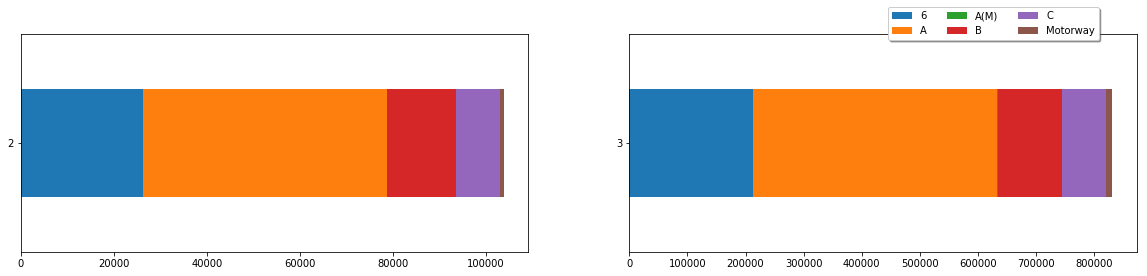

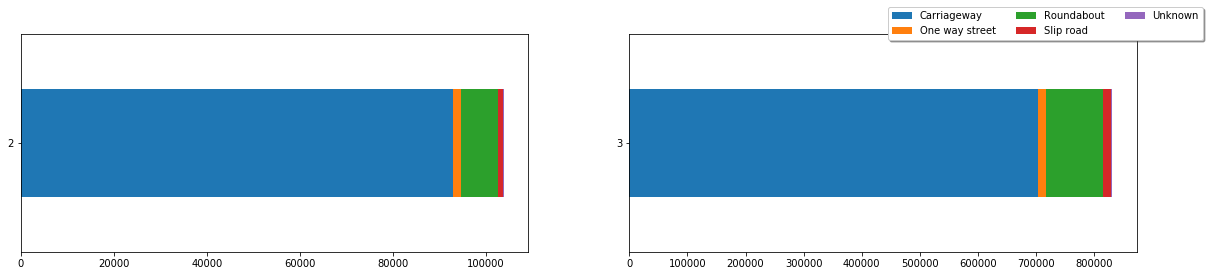

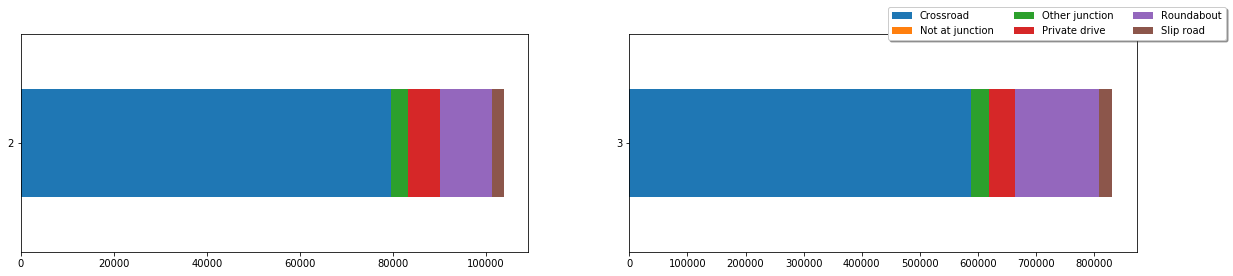

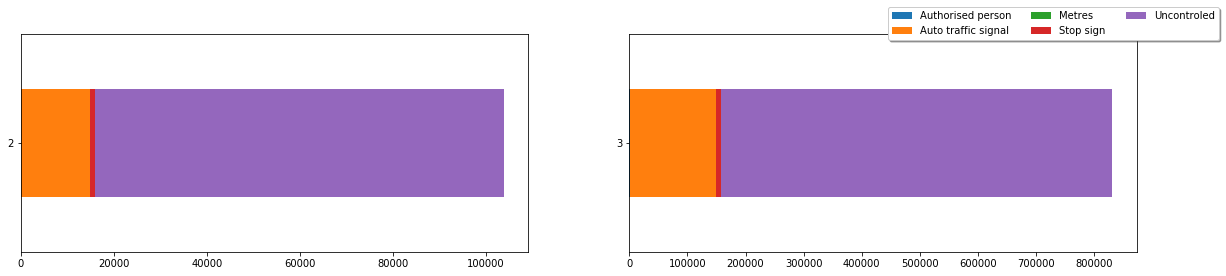

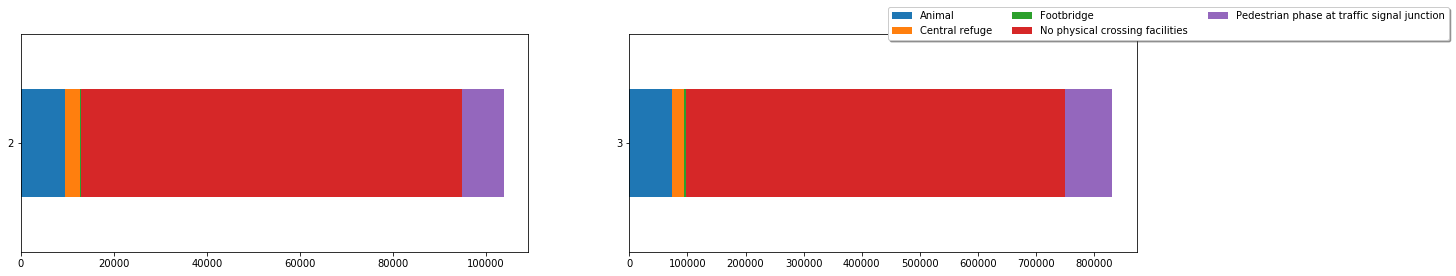

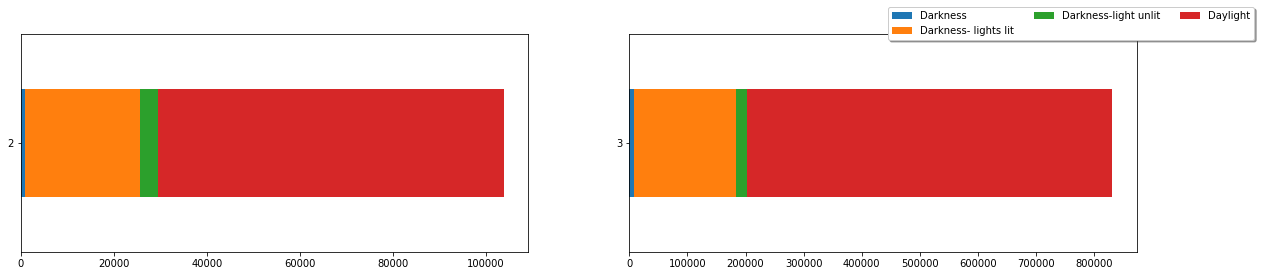

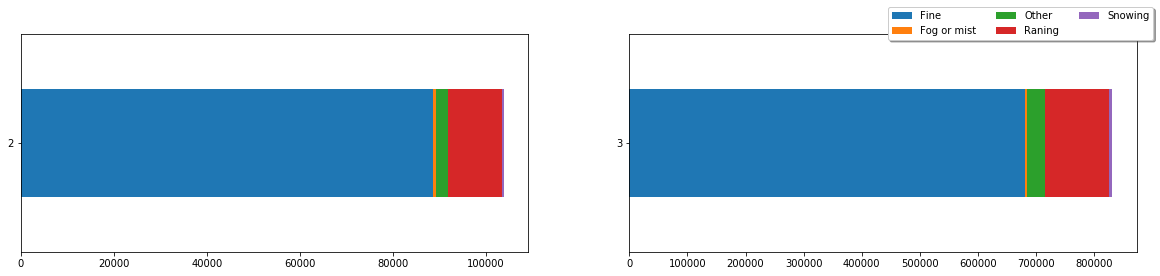

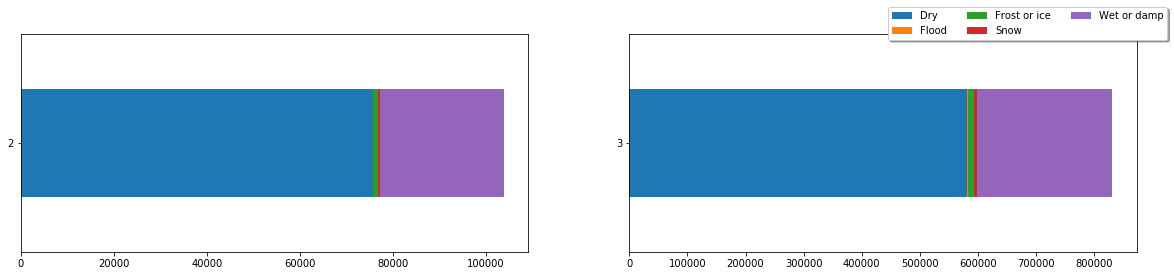

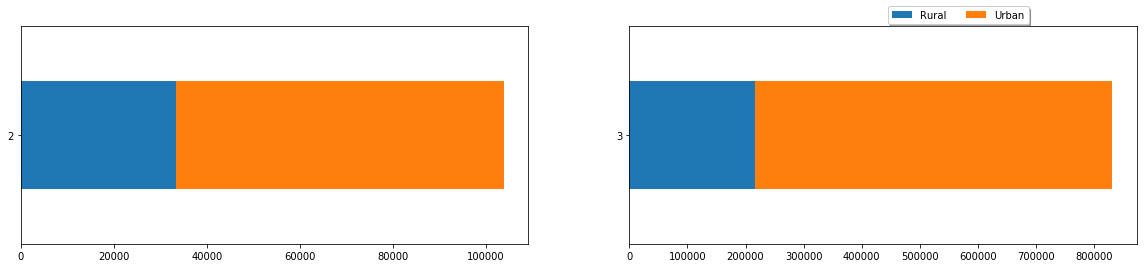

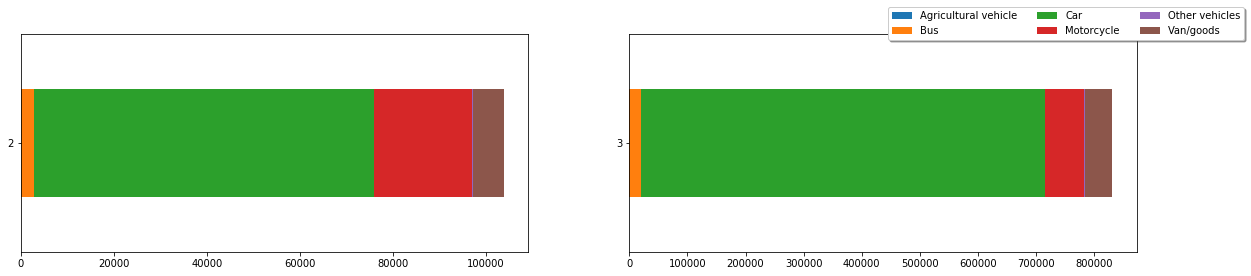

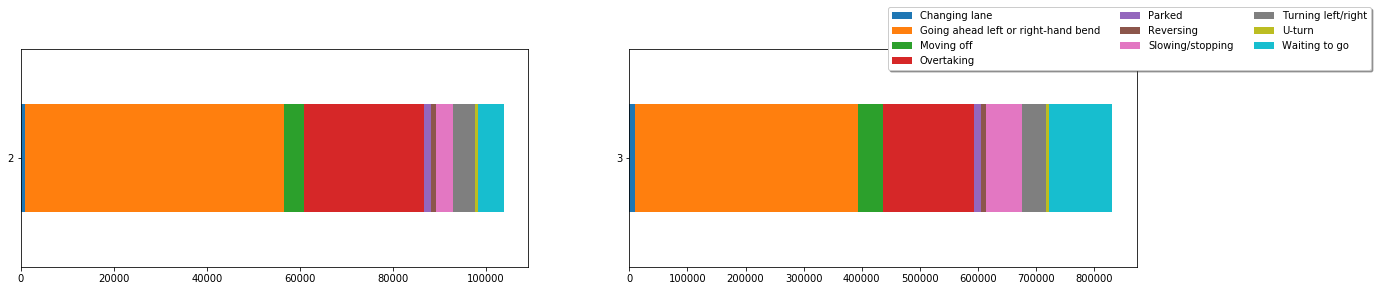

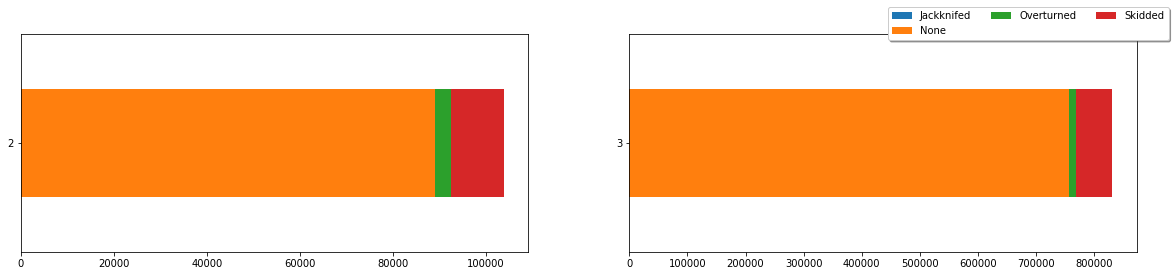

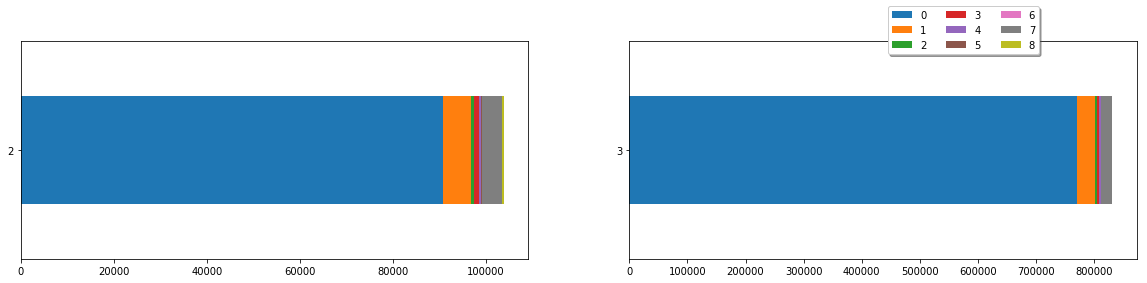

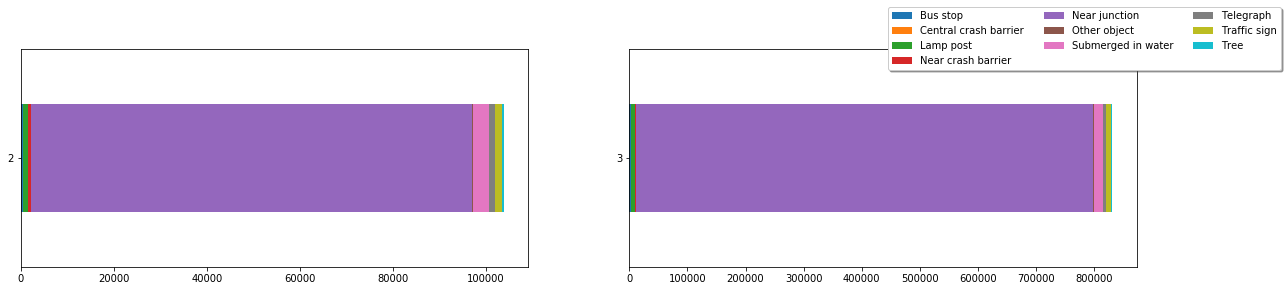

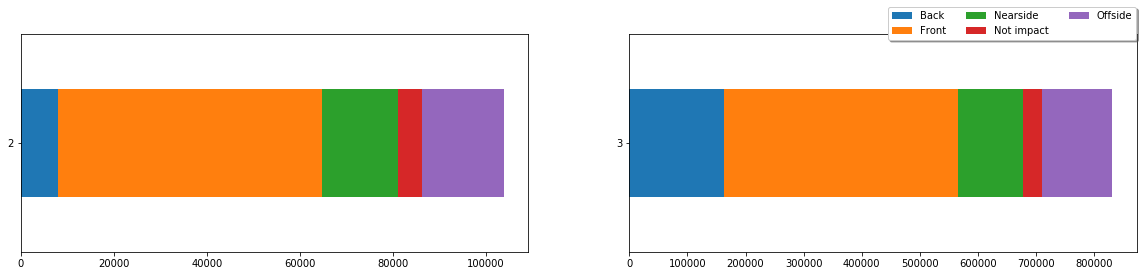

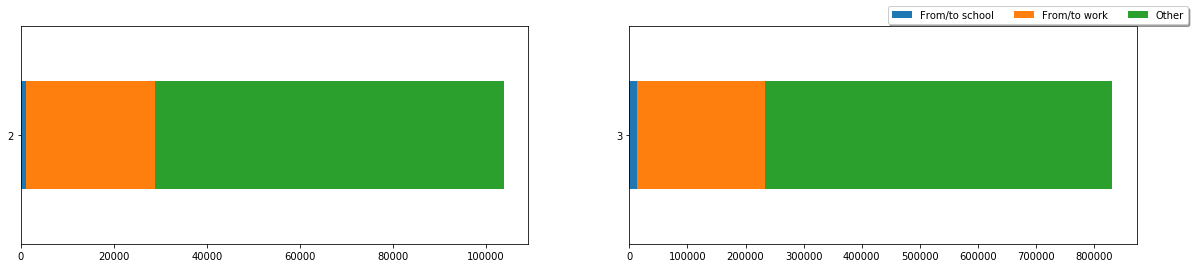

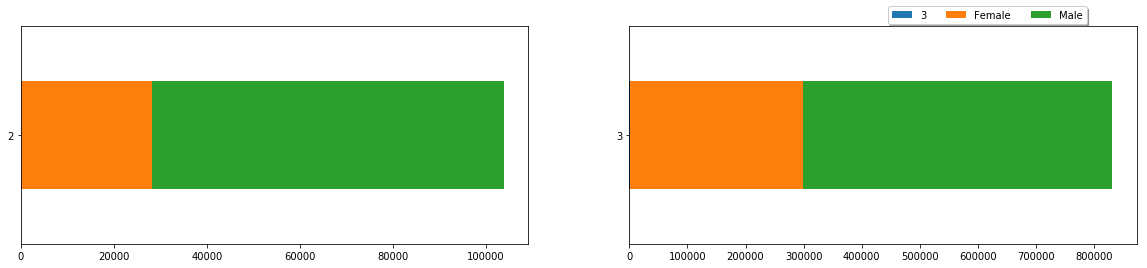

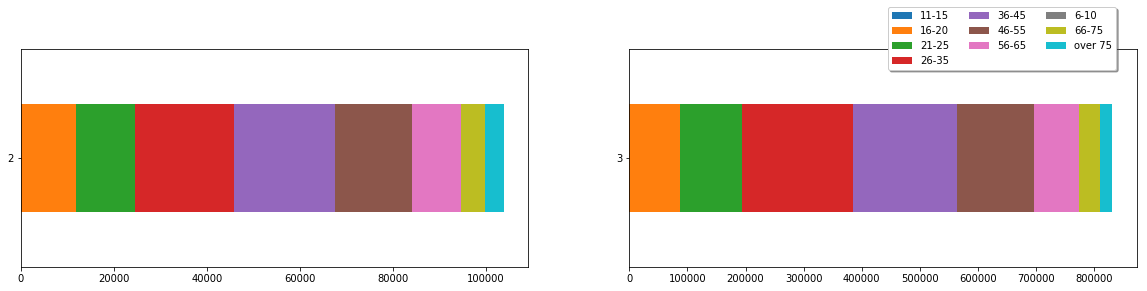

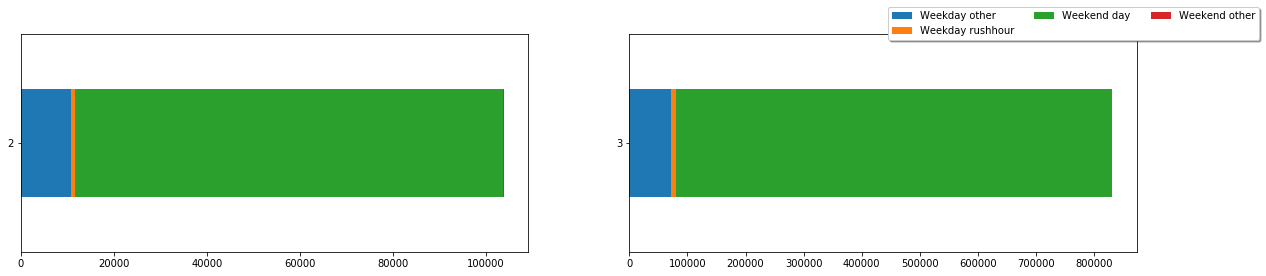

In [7]:
Categorical= ['1st_Road_Class', 'Road_Type',
       'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
        'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Time_Cat']  

for i in Categorical:

    grouped = accidents_1.groupby(['Accident_Severity',i]).size().reset_index().pivot(columns=i, index='Accident_Severity', values=0)

    fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,4))
    g = grouped.iloc[0]
    g = pd.DataFrame(g).T
    g.plot(kind='barh', stacked=True,ax=ax1)
    ax1.get_legend().remove()

    g1 = grouped.iloc[1]
    g1 = pd.DataFrame(g1).T
    g1.plot(kind='barh', stacked=True,ax=ax2,mark_right=True)
    ax2.legend(loc='center left', bbox_to_anchor=(0.5, 1.05),
                ncol=3, fancybox=True, shadow=True)

In [8]:
toDelete = ['1st_Road_Number','Police_Force', 'Driver_Home_Area_Type','Day_of_Week',
            'Time', 'Local_Authority_(District)','2nd_Road_Class', '2nd_Road_Number',
            '2nd_Road_Class','Towing_and_Articulation','Pedestrian_Crossing-Human_Control',
            'Was_Vehicle_Left_Hand_Drive?', 'Hit_Object_in_Carriageway','Carriageway_Hazards',
            'Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Propulsion_Code',
            'Driver_IMD_Decile','1st_Road_Class','Pedestrian_Crossing-Physical_Facilities',
            'Road_Surface_Conditions','Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane',
            'Junction_Location','Journey_Purpose_of_Driver']
accidents =accidents.drop(toDelete,axis=1)

In [ ]:
accidents = accidents.dropna(axis = 0, how ='any') 
accidents.drop(accidents.loc[accidents['Sex_of_Driver']==3].index, inplace=True)
accidents.drop(accidents.loc[accidents['Engine_Capacity_(CC)']==91000].index, inplace=True)

In [ ]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942310 entries, 0 to 942315
Data columns (total 21 columns):
Accident_Severity              942310 non-null object
Number_of_Vehicles             942310 non-null float64
Number_of_Casualties           942310 non-null object
Road_Type                      942310 non-null object
Speed_limit                    942310 non-null float64
Junction_Detail                942310 non-null object
Junction_Control               942310 non-null object
Light_Conditions               942310 non-null object
Weather_Conditions             942310 non-null object
Urban_or_Rural_Area            942310 non-null object
Vehicle_Reference              942310 non-null object
Vehicle_Type                   942310 non-null object
Skidding_and_Overturning       942310 non-null object
Vehicle_Leaving_Carriageway    942310 non-null object
Hit_Object_off_Carriageway     942310 non-null object
1st_Point_of_Impact            942310 non-null object
Sex_of_Driver          

In [ ]:
accidents.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Reference', 'Vehicle_Type', 'Skidding_and_Overturning',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Time_Cat'],
      dtype='object')

In [ ]:
X = accidents.drop('Accident_Severity', axis=1)
Y= accidents['Accident_Severity']
scaler = StandardScaler()
X[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']]=scaler.fit_transform(X[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)


In [ ]:
X_train_rare = copy.copy(X_train)
X_test_rare = copy.copy(X_test)
X_train_rare["test"]=0
X_test_rare["test"]=1
temp_df = pd.concat([X_train_rare,X_test_rare],axis=0)

names = list(X_train_rare.columns.values)
unwanted_num = ['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']
list1 = [ele for ele in names if ele not in unwanted_num] 

for i in list1:
    temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 20000, i] = "RARE_VALUE"
X_train_rare = temp_df[temp_df["test"]==0].iloc[:,:-1]
X_test_rare = temp_df[temp_df["test"]==1].iloc[:,:-1]

X_train_rare

,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area,Vehicle_Reference,Vehicle_Type,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Time_Cat
877141,-0.107238,2,3,-0.528039,2,4,1,1,1,2,3,0,0,0,2,1,5,-0.237167,-0.950931,1
425218,-0.107238,3,3,0.320671,2,4,1,1,2,1,3,0,0,0,1,1,4,-0.459526,0.387548,1
145508,-0.107238,1,3,-0.528039,1,4,2,1,1,1,3,0,0,0,1,1,5,-0.016127,-0.504771,1
584749,-0.107238,2,3,-0.528039,2,4,2,1,1,2,3,0,0,0,1,1,6,-0.542664,-0.727851,1
817292,-1.623746,1,RARE_VALUE,-0.528039,5,2,1,1,1,1,3,0,0,0,4,1,6,0.216129,-0.504771,1
297433,-1.623746,1,3,-0.528039,2,2,1,2,1,1,2,1,0,0,3,1,6,-1.118686,-1.174010,3
787747,-0.107238,1,3,-0.528039,5,4,1,1,1,1,3,0,1,0,1,2,7,0.008946,1.056787,1
428007,-0.107238,1,3,-0.528039,5,4,1,1,1,1,3,0,0,0,1,1,4,0.049855,-0.058612,1
63665,-0.107238,1,3,-0.528039,2,RARE_VALUE,1,1,1,2,3,0,0,0,2,2,7,-0.146772,-0.504771,RARE_VALUE
579306,-0.107238,2,1,2.018090,1,4,2,1,2,2,3,0,0,0,2,1,9,0.115177,-0.281691,3


In [ ]:
X_train_rare.columns

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Reference', 'Vehicle_Type', 'Skidding_and_Overturning',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Time_Cat'],
      dtype='object')

In [ ]:
X_train_rare = pd.get_dummies(X_train_rare, columns = ['Number_of_Casualties', 'Road_Type',
        'Junction_Detail', 'Junction_Control',
       'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Reference', 'Vehicle_Type', 'Skidding_and_Overturning',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Time_Cat'],drop_first = True)





In [ ]:
X_train_rare 

,Number_of_Vehicles,Speed_limit,Engine_Capacity_(CC),Age_of_Vehicle,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_RARE_VALUE,Road_Type_3,Road_Type_RARE_VALUE,Junction_Detail_2,...,Age_Band_of_Driver_11,Age_Band_of_Driver_4,Age_Band_of_Driver_5,Age_Band_of_Driver_6,Age_Band_of_Driver_7,Age_Band_of_Driver_8,Age_Band_of_Driver_9,Age_Band_of_Driver_RARE_VALUE,Time_Cat_3,Time_Cat_RARE_VALUE
877141,-0.107238,-0.528039,-0.237167,-0.950931,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
425218,-0.107238,0.320671,-0.459526,0.387548,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
145508,-0.107238,-0.528039,-0.016127,-0.504771,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
584749,-0.107238,-0.528039,-0.542664,-0.727851,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
817292,-1.623746,-0.528039,0.216129,-0.504771,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
297433,-1.623746,-0.528039,-1.118686,-1.174010,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
787747,-0.107238,-0.528039,0.008946,1.056787,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
428007,-0.107238,-0.528039,0.049855,-0.058612,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
63665,-0.107238,-0.528039,-0.146772,-0.504771,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
579306,-0.107238,2.018090,0.115177,-0.281691,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train_rare.shape

(565386, 53)

In [ ]:
# RBF kernel 
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

#Train error of rbf kernel
pred_new = svm_model_rbf.predict(X_train)
cm1 = confusion_matrix(y_train, pred_new)
print(cm1)
print('\n')
print(classification_report(y_train, pred_new))
count_misclassified = (y_train != pred_new).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, pred_new)
specificity= cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))

# Test error of rbf kernel
pred_test= svm_model_rbf.predict(X_test)
cm1 = confusion_matrix(y_test, pred_test)
print(cm1)
print('\n')
print(classification_report(y_test, pred_test))
count_misclassified = (y_test != pred_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, pred_test)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#linear kernel 
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X_train, y_train)

#Train error of linear kernel
pred_linear = svm_model_linear.predict(X_train)
cm1 = confusion_matrix(y_train, pred_linear)
print(cm1)
print('\n')
print(classification_report(y_train, pred_linear))
count_misclassified = (y_train != pred_linear).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, pred_linear)
specificity= cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))

#Test error of linear kernel
pred_test_linear = svm_model_linear.predict(X_test)
cm1 = confusion_matrix(y_test, pred_test_linear)
print(cm1)
print('\n')
print(classification_report(y_test, pred_test_linear))
count_misclassified = (y_test != pred_test_linear).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, pred_test_linear)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')


In [ ]:
#polynomial kernel 
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(X_train, y_train)

#Train error of polynomial kernel
pred_poly = svm_model_poly.predict(X_train)
cm1 = confusion_matrix(y_train, pred_poly)
print(cm1)
print('\n')
print(classification_report(y_train, pred_poly))
count_misclassified = (y_train != pred_poly).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, pred_poly)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')

#Test error of polynomial kernel
pred_test_poly = svm_model_poly.predict(X_test)
cm1 = confusion_matrix(y_test_new, pred_test_poly)
print(cm1)
print('\n')
print(classification_report(y_test_new, pred_test_poly))
count_misclassified = (y_test != pred_test_poly).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, pred_test_poly)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')

In [ ]:
#sigmoid kernel 
svm_model_sigmoid = SVC(kernel='sigmoid')
svm_model_sigmoid.fit(X_train, y_train)

#Train error of sigmoid kernel
pred_sigmoid = svm_model_sigmoid.predict(X_train)
cm1 = confusion_matrix(y_train_new, pred_sigmoid)
print(cm1)
print('\n')
print(classification_report(y_train, pred_sigmoid))
count_misclassified = (y_train != pred_sigmoid).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, pred_sigmoid)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')


#Test error of sigmoid kernel
pred_test_sigmoid = svm_model_sigmoid.predict(X_test)
cm1 = confusion_matrix(y_test, pred_test_sigmoid)
print(cm1)
print('\n')
print(classification_report(y_test, pred_test_sigmoid))
count_misclassified = (y_test_new != pred_test_sigmoid).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, pred_test_sigmoid)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity: {:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))
print('Accuracy: {:.2f}'.format(accuracy))
print('\n')

In [ ]:
accidents['Date']=accidents['Date'].astype(str)
accidents['Month'] = pd.DatetimeIndex(accidents['Date']).month

plt.figure(figsize=(12,5))
roadplot = sns.countplot(x=accidents['Month'],palette="Paired")

for p in roadplot.patches: 
    height = p.get_height() 
    roadplot.text(p.get_x()+p.get_width()/2., 
      height + 4, 
      '{:1.2f}'.format((height/len(accidents['Month']))*100)+'%',  
      ha="center") 
plt.show()

In [ ]:
accidents['Road_Type'] = accidents['Road_Type'].replace("6","3").replace('7','4').replace('9','5')
accidents['Junction_Detail']=accidents['Junction_Detail'].replace('2','1').replace('3','2').replace('6','2').replace('7','2').replace('5','3').replace('8','4').replace('9','5')
accidents['Pedestrian_Crossing-Physical_Facilities']=accidents['Pedestrian_Crossing-Physical_Facilities'].replace('4','1').replace('5','2').replace('7','3').replace('8','4')
accidents['Light_Conditions'] = accidents['Light_Conditions'].replace('4','2').replace('5','3').replace('6','3').replace('7','4')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].replace('4','1').replace('5','2').replace('6','3').replace('7','4').replace('8','5').replace('9','5')
accidents['Special_Conditions_at_Site'] = accidents['Special_Conditions_at_Site'].replace('2','1').replace('3','1').replace('4','2').replace('5','3').replace('6','4').replace('7','5')
accidents['Carriageway_Hazards'] = accidents['Carriageway_Hazards'].replace('6','4').replace('7','5')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].replace('3','2').replace('4','2').replace('5','2').replace('8','3').replace('9','3').replace('10','4').replace('11','4').replace('16','5').replace('17','6').replace('18','7').replace('19','8').replace('20','8').replace('21','8').replace('22','2').replace('23','2').replace('90','9').replace('97','9').replace('98','9')
accidents['Vehicle_Manoeuvre'] = accidents['Vehicle_Manoeuvre'].replace('8','3').replace('10','3').replace('8','7').replace('11','8').replace('12','8').replace('13','9').replace('14','9').replace('15','9').replace('16','10').replace('17','10').replace('18','10')
accidents['Vehicle_Location-Restricted_Lane'] = accidents['Vehicle_Location-Restricted_Lane'].replace('3','2').replace('4','3').replace('5','3').replace('6','3').replace('7','4').replace('8','4').replace('9','4').replace('10','5').replace('11','6')
accidents['Junction_Location'] = accidents['Junction_Location'].replace('1','0').replace('2','0').replace('3','1').replace('4','1').replace('5','2').replace('6','2').replace('7','3').replace('8','3').replace('9','4')
accidents['Skidding_and_Overturning'] = accidents['Skidding_and_Overturning'].replace('2','2').replace('4','2').replace('5','2')
accidents['Hit_Object_off_Carriageway'] = accidents['Hit_Object_off_Carriageway'].replace('4','3').replace('5','4').replace('6','4').replace('7','5').replace('8','6').replace('9','7').replace('10','8').replace('12','9').replace('11','10')
accidents['Journey_Purpose_of_Driver'] = accidents['Journey_Purpose_of_Driver'].replace('2','1').replace('3','2').replace('4','2').replace('5','3').replace('6','3')

In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941296 entries, 0 to 942315
Data columns (total 44 columns):
Police_Force                               941296 non-null object
Accident_Severity                          941296 non-null object
Number_of_Vehicles                         941296 non-null float64
Number_of_Casualties                       941296 non-null object
Day_of_Week                                941296 non-null object
Time                                       941296 non-null object
Local_Authority_(District)                 941296 non-null object
1st_Road_Class                             941296 non-null object
1st_Road_Number                            941296 non-null object
Road_Type                                  941296 non-null object
Speed_limit                                941296 non-null float64
Junction_Detail                            941296 non-null object
Junction_Control                           941296 non-null object
2nd_Road_Class               

In [7]:
cleanup_nums = {'1st_Road_Class': {"1":"Motorway","2":"A(M)","3":"A","4":"B","5":"C"},
                 'Road_Type': {"1":"Roundabout","2":"One way street","3":"Dual Carriageway","6":"Single Carriageway","7":"Slip road","9":"Unknown","12":"One way street/slip road"},
                 'Junction_Detail':{"0":"Not at junction","1":"Roundabout","2":"Mini-Roundabout","3":"T or staggered junction","5":"Slip road","6":"Crossroads","7":"More than 4 arms","8":"Private drive or entrance","9":"Other junction"},
                'Junction_Control':{"0":"Metres","1":"Authorised person","2":"Auto traffic signal","3":"Stop sign","4":"Uncontroled"},
                'Pedestrian_Crossing-Physical_Facilities':{"0":"No physical crossing facilities","1":"Zebra","4":"Pelican, puffin, toucan or similar non-junction pedestrian light crossing","5":"Pedestrian phase at traffic signal junction","7":"Footbridge","8":"Central refuge"},
                'Urban_or_Rural_Area':{"1": "Urban", "2": "Rural"},
                
                'Vehicle_Type':{"0":"Pedal cycle", "2": "Motorcycle 50cc and under","3":"Motorcycle 125cc and under","4":"Motorcycle over 125cc and up to 500cc","5":"Motorcycle over 500cc","8":"Taxi/Private hire car",
                                "9":"Car","10":"Minibus (8 - 16 passenger seats)","11":"Bus or coach","16":"Horse rider","17":"Agricultural vehicle","18":"Tram occupant","19":"Van / Goods vehicle ","20":"Goods vehicle (over 3.5t. and under 7.5t.)","21":"Goods vehicle (7.5 tonnes mgw and over)",
                               "22":"Mobility scooter","23":"Electric motorcycle","90":"Other vehicle","97":"Motorcycle - unknown cc","98":"Goods vehicle (unknown weight)"},
                
                'Vehicle_Manoeuvre':{"1": "Reversing", "2": "Parked","3":"Waiting to go","4":"Slowing/stopping","5":"Moving off","6":"U-turn","7":"Turning left","8":"Waiting to turning left","9":"Turning right","10":"Waiting to turning right","11":"Chaning lane to left","12":"Chaning lane to right",
                                    "13": "Overtaking moving vehicle-offside", "14": "Overtaking static vehicle-offside","15":"Overtaking-nearside","16":"Going ahead left-hand bend","17":"Going ahead right-hand bend","18":"Going ahead other"},
                'Junction_Location':{"0":"Near junction","1":"Approaching junction","2":"Clearing junction or wating/parking at junction","3":"Leaving roundabout","4":"Entering roundabout","5":"Leaving main road","6":"Entering main road","7":"Entering from slip road","8":"Mid junction"},
                'Skidding_and_Overturning':{"0":"None","1":"Skidded","2":"Skidded and Overturned","3":"Jackknifed","4":"Jackknifed and overturned","5":"Overturned"},
                'Hit_Object_off_Carriageway':{"0":"Near junction","1":"Previous accident","2":"Road works","4":"Parked works","5":"Bridge(roof)","6":"Bridge(side)","7":"Bollard or refuge","8":"Open door of vehicle","9":"Central island of roundabout","10":"Kerb","11":"Other object"},
                 '1st_Point_of_Impact':{"0": 'Not impact', "1": 'Front',"2":'Back',"3":'Offside',"4":'Nearside'},
                 'Journey_Purpose_of_Driver':{"1": 'Journey as part of work', "2": 'Commuting to/from work',"3":'Taking pupil to/from school',"4":"Pupil riding to/from school","5":"Other","6":"Unknown"}, 
                 'Sex_of_Driver':{"1": 'Male', "2": 'Female'},
                
                'Age_Band_of_Driver':{"1": '0-5', "2": '6-10',"3":'11-15',"4":'16-20',"5":'21-25',"6":'26-35', "7": '36-45',"8":'46-55',"9":'56-65',"10":"66-75","11":"over 75"},
                'Driver_IMD_Decile':{"1": 'Most deprived 10%', "2": 'More deprived 10-20%',"3":'More deprived 20-30%',"4":'More deprived 30-40%',"5":'More deprived 40-50%',"6":'Less deprived 50-40%',"7": 'Less deprived 40-30%',"8":'Less deprived 30-20%',"9":'Less deprived 20-10%',"10":"Less deprived 10%"},
                'Time_Cat':{"0": 'Weekday rushhour', "1": 'Weekend day',"2":'Weekend other',"3":'Weekday other'},
                "Day_of_Week": {"1": "Sun", "2": "Mon", "3": "Tue", "4": "Wed","5": "Thr", "6": "Fri", "7":"Sat" },
                "Accident_Severity":{"1":"fatal" , "2": "Non Fatal"},
                
                'Light_Conditions': {"1": 'Daylight',"4": 'Darkness- lights lit', "5":'Darkness- lights unlit',"6":'Darkness-no lighting',"7":'Darkness-lighting unknown'},
                'Weather_Conditions': {"1":'Fine no high winds','2':"Raning no high winds",'3':"Snowing no high winds",'4':"Fine-high winds",'5':"Raining-high winds",'6':"Snowing-high winds","7":"Fog or mist","8":"Others","9":"Unknown"},
                'Road_Surface_Conditions': {"1":"Dry","2":"Wet or damp","3":"Snow","4":"Frost or ice","5":"Flood","6":"Oil or diesel"},
                'Special_Conditions_at_Site':{'0':"None","1":"Auto traffic signal-out","2":"Auto signal part defective","3":"Road sign or making defective or obscure","4":"Roadworks","5":"Road surfae defective","6":"Oil or diesel","7":"Mud"}}

accidents_1 = accidents.replace(cleanup_nums) 

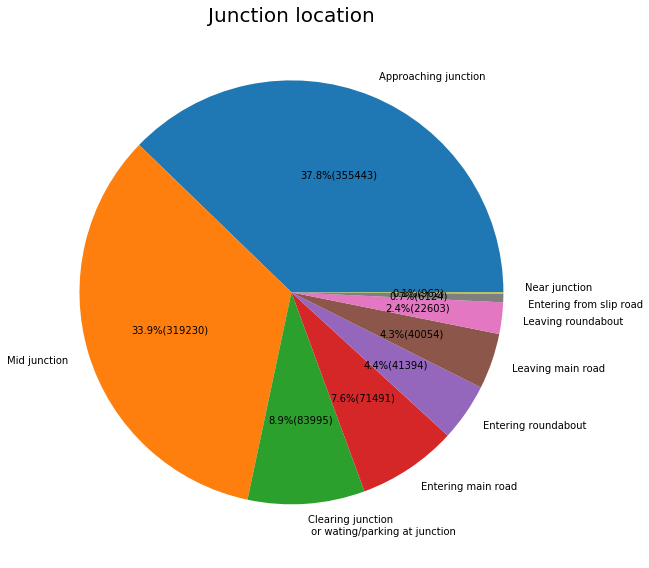

In [28]:
values = list(accidents_1['Junction_Location'].value_counts())
labels = ['Approaching junction', 'Mid junction',
       'Clearing junction \n or wating/parking at junction', 'Entering main road',
       'Entering roundabout', 'Leaving main road', 'Leaving roundabout',
       '\n Entering from slip road', 'Near junction \n']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(values, labels=labels, autopct=make_autopct(values))

plt.title('Junction location',fontsize=20)
plt.tight_layout()

plt.show()

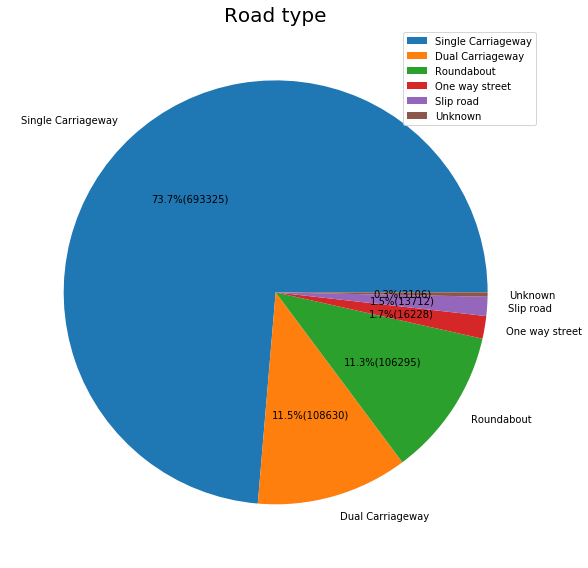

In [18]:
values = list(accidents_1['Road_Type'].value_counts())
labels = ["Single Carriageway","Dual Carriageway","Roundabout","One way street","Slip road","Unknown"] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(values, labels=labels, autopct=make_autopct(values))

ax1.legend(labels, loc="best")
plt.title('Road type',fontsize=20)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler 
toDelete = ['2nd_Road_Class','Towing_and_Articulation','Pedestrian_Crossing-Human_Control','Was_Vehicle_Left_Hand_Drive?', 'Hit_Object_in_Carriageway','Carriageway_Hazards','Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Propulsion_Code']
accidents =accidents.drop(toDelete,axis=1)

col = accidents.columns.values.tolist()

X = accidents.drop('Accident_Severity', axis=1)
Y= accidents['Accident_Severity']

scaler = StandardScaler()
X[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']]=scaler.fit_transform(X[['Number_of_Vehicles','Speed_limit','Engine_Capacity_(CC)','Age_of_Vehicle']])

accidents = pd.get_dummies(accidents, columns = [ '1st_Road_Class', 'Road_Type',
       'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Type', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning','Day_of_Week',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Age_Band_of_Driver','Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Time_Cat'],drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)


In [37]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rfc= RandomForestClassifier(n_estimators=500, max_leaf_nodes=5, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))
accuracy = metrics.accuracy_score(y_train, rfc_pred_train)


rfc_pred_test = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred_test))
accuracy = metrics.accuracy_score(y_test, rfc_pred_test)



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     66466
           2       0.88      1.00      0.94    498311

   micro avg       0.88      0.88      0.88    564777
   macro avg       0.44      0.50      0.47    564777
weighted avg       0.78      0.88      0.83    564777



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     44306
           2       0.88      1.00      0.94    332213

   micro avg       0.88      0.88      0.88    376519
   macro avg       0.44      0.50      0.47    376519
weighted avg       0.78      0.88      0.83    376519



In [39]:
rfc= RandomForestClassifier(n_estimators=700, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))
accuracy = metrics.accuracy_score(y_train, rfc_pred_train)


rfc_pred_test = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred_test))
accuracy = metrics.accuracy_score(y_test, rfc_pred_test)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     66466
           2       0.88      1.00      0.94    498311

   micro avg       0.88      0.88      0.88    564777
   macro avg       0.44      0.50      0.47    564777
weighted avg       0.78      0.88      0.83    564777



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     44306
           2       0.88      1.00      0.94    332213

   micro avg       0.88      0.88      0.88    376519
   macro avg       0.44      0.50      0.47    376519
weighted avg       0.78      0.88      0.83    376519



In [40]:
rfc= RandomForestClassifier(n_estimators=1000, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))
accuracy = metrics.accuracy_score(y_train, rfc_pred_train)


rfc_pred_test = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred_test))
accuracy = metrics.accuracy_score(y_test, rfc_pred_test)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     66466
           2       0.88      1.00      0.94    498311

   micro avg       0.88      0.88      0.88    564777
   macro avg       0.44      0.50      0.47    564777
weighted avg       0.78      0.88      0.83    564777



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     44306
           2       0.88      1.00      0.94    332213

   micro avg       0.88      0.88      0.88    376519
   macro avg       0.44      0.50      0.47    376519
weighted avg       0.78      0.88      0.83    376519

